<a href="https://colab.research.google.com/github/AjayKadoula/Mtech_Lab_1/blob/main/Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apriori Algorithm**
Apriori Algorithm is a Machine Learning algorithm which is used to gain insight into the structured relationships between different items involved. The most prominent practical application of the algorithm is to recommend products based on the products already present in the user’s cart. Walmart especially has made great use of the algorithm in suggesting products to it’s users.

**The main idea of Apriori is :**

All non-empty subsets of a frequent itemset must also be frequent.
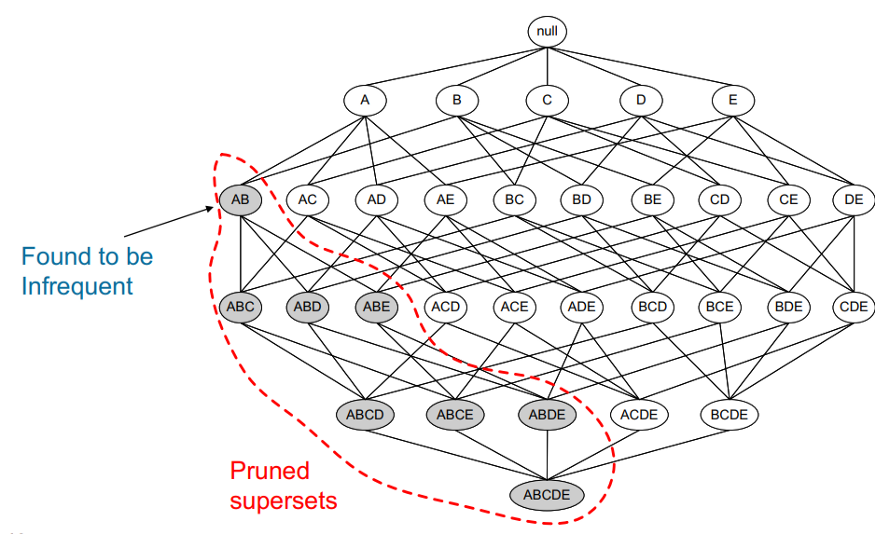

It’s a bottom-up approach. We started from every single item in the itemset list. Then, the candidates are generated by self-joining. We extend the length of the itemsets one item at a time. The subset test is performed at each stage and the itemsets that contain infrequent subsets are pruned. We repeat the process until no more successful itemsets can be derived from the data.

Dataset link : [Online_Retail.xlsx](http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx)

In [64]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

In [65]:
data = pd.read_excel("OnlineRetail.xlsx") 
data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [66]:
data.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [67]:
data.Country.unique() 

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

### Cleaning the Data :-

In [68]:
data['Description'] = data['Description'].str.strip() 
  

data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
data['InvoiceNo'] = data['InvoiceNo'].astype('str') 
  

data = data[~data['InvoiceNo'].str.contains('C')] 

# Splitting the data according to the region of transaction:-

In [69]:
# Transactions done in France 
basket_France = (data[data['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
# Transactions done in the United Kingdom 
basket_UK = (data[data['Country'] =="United Kingdom"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
# Transactions done in Portugal 
basket_Por = (data[data['Country'] =="Portugal"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 
  
basket_Sweden = (data[data['Country'] =="Sweden"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [70]:
# Defining the hot encoding function to make the data suitable  
# for the concerned libraries 
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1
  
# Encoding the datasets 
basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded 
  
basket_encoded = basket_UK.applymap(hot_encode) 
basket_UK = basket_encoded 
  
basket_encoded = basket_Por.applymap(hot_encode) 
basket_Por = basket_encoded 
  
basket_encoded = basket_Sweden.applymap(hot_encode) 
basket_Sweden = basket_encoded 

#  Buliding the models and analyzing the results :-

In [71]:
# Building the model 
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

                                           antecedents  ... conviction
45                        (JUMBO BAG WOODLAND ANIMALS)  ...        inf
259  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...  ...        inf
271  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...  ...        inf
302  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...  ...  34.897959
301  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...  ...  34.489796

[5 rows x 9 columns]


In [72]:
#UK
frq_items = apriori(basket_UK, min_support = 0.01, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

                                       antecedents  ... conviction
116           (BEADED CRYSTAL HEART PINK ON STICK)  ...  39.637371
2018  (JAM MAKING SET PRINTED, SUKI  SHOULDER BAG)  ...  26.096206
2296         (HERB MARKER THYME, HERB MARKER MINT)  ...  21.947227
2300   (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)  ...  20.444951
2302      (HERB MARKER PARSLEY, HERB MARKER THYME)  ...  20.443842

[5 rows x 9 columns]


In [73]:
#portgul
frq_items = apriori(basket_Por, min_support = 0.05, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head())

                              antecedents  ... conviction
1170     (SET 12 COLOUR PENCILS SPACEBOY)  ...        inf
1171   (SET 12 COLOUR PENCILS DOLLY GIRL)  ...        inf
1172   (SET OF 4 KNICK KNACK TINS LONDON)  ...        inf
1173   (SET 12 COLOUR PENCILS DOLLY GIRL)  ...        inf
1174  (SET OF 4 KNICK KNACK TINS POPPIES)  ...        inf

[5 rows x 9 columns]


In [74]:
#sweden
frq_items = apriori(basket_Sweden, min_support = 0.05, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

                        antecedents  ... conviction
0     (12 PENCILS SMALL TUBE SKULL)  ...        inf
1     (PACK OF 72 SKULL CAKE CASES)  ...        inf
4           (36 DOILIES DOLLY GIRL)  ...        inf
5    (ASSORTED BOTTLE TOP  MAGNETS)  ...        inf
180  (CHILDRENS CUTLERY DOLLY GIRL)  ...        inf

[5 rows x 9 columns]


On analyzing the above rules, it is found that boys’ and girls’ cutlery are paired together. This makes practical sense because when a parent goes shopping for cutlery for his/her children, he/she would want the product to be a little customized according to the kid’s wishes.